## Image pre-processing using OpenCV, Numpy and Scikit-image


In [ ]:
# Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage import io
from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure

## Loading and visualizing images


Gray image is 1-channeled or 1-dim
(256, 256)


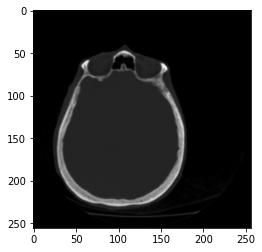

In [ ]:
# Gray scale image
# Load a sample grayscale brain image from scikit-image's data module
brain_set = data.brain()

# Extract the first slice of the brain image
brain = brain_set[0, :]

# Set the color map to grayscale
plt.gray()

# Display the grayscale brain image using matplotlib
plt.imshow(brain)

# Print information about the image
print('Gray image is 1-channeled or 1-dim')
print(brain.shape)

## Histogram Equalization

Histogram equalization is performed to enhance the contrast of the image



(array([0.0000e+00, 0.0000e+00, 5.9500e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.2080e+03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

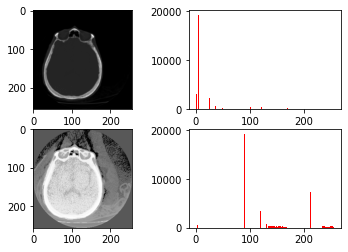

In [ ]:
# Global equalization
# Apply histogram equalization to the original brain image
img_rescale = exposure.equalize_hist(brain)

# Convert the rescaled image to uint8 format (0-255)
img_rescale = np.array(255 * img_rescale, dtype='uint8')

# Create a subplot with 2 rows and 2 columns
plt.subplot(221)
# Plot the original brain image
plt.imshow(brain)

# Create a subplot for the histogram of the original brain image
plt.subplot(222)
plt.hist(brain.flatten(), 256, [0, 256], color='r')

# Create a subplot for the rescaled brain image
plt.subplot(223)
plt.imshow(img_rescale, cmap=plt.cm.gray)

# Create a subplot for the histogram of the rescaled brain image
plt.subplot(224)
plt.hist(img_rescale.flatten(), 256, [0, 256], color='r')

# Display the subplots
plt.show()

## Adding Gaussian and salt and pepper noise

Add noises to the image

**Tasks** 
 
 Generate multiple noise images with different noise levels.


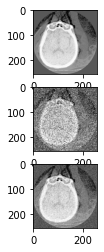

In [ ]:
from skimage import filters
from skimage.util import random_noise

# Add Salt-and-Pepper (SP) Noise to the equalized image
sp_img = random_noise(img_rescale, mode='s&p', amount=0.3)

# Convert the floating-point image to 'uint8' format and scale to [0, 255]
sp_img = np.array(255 * sp_img, dtype='uint8')

# Add Gaussian Noise to the equalized image
gauss_img = random_noise(img_rescale, mode='gaussian')

# Convert the floating-point image to 'uint8' format and scale to [0, 255]
gauss_img = np.array(255 * gauss_img, dtype='uint8')

# Create subplots to display the original image, image with SP noise, and image with Gaussian noise
plt.subplot(311)
plt.imshow(img_rescale, cmap=plt.cm.gray)
plt.title('Original Image')

plt.subplot(312)
plt.imshow(sp_img, cmap=plt.cm.gray)
plt.title('Image with Salt-and-Pepper Noise')

plt.subplot(313)
plt.imshow(gauss_img, cmap=plt.cm.gray)
plt.title('Image with Gaussian Noise')

# Display the subplots
plt.show()

## Image Filtering

*  Gaussian filtering and mean filtering is used for Gaussian noise by smoothing the image
*  Median filtering is used for salt and pepper noise

**Tasks** 
 
 Modify the filter size and compare the filtering.

 Visualize the edge pixels of the image to observe the effect of filtering.

 What is the best filter for a particular noise type? Show examples.



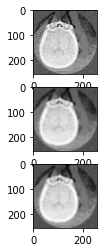

In [ ]:
# Mean Filter
# Set the dimension of the kernel for mean filtering
figure_size = 9

# Apply mean filtering to the image with Gaussian noise
mean_filter_gauss_noise = cv2.blur(gauss_img, (figure_size, figure_size))

# Gaussian Filter
# Apply Gaussian filtering to the image with Gaussian noise
gauss_filter_gauss_noise = cv2.GaussianBlur(gauss_img, (figure_size, figure_size), cv2.BORDER_DEFAULT)

# Create subplots to display the original image with Gaussian noise,
# image after mean filtering, and image after Gaussian filtering
plt.subplot(311)
plt.imshow(gauss_img, cmap=plt.cm.gray)
plt.title('Image with Gaussian Noise')

plt.subplot(312)
plt.imshow(mean_filter_gauss_noise, cmap=plt.cm.gray)
plt.title('Mean Filtered Image')

plt.subplot(313)
plt.imshow(gauss_filter_gauss_noise, cmap=plt.cm.gray)
plt.title('Gaussian Filtered Image')

# Display the subplots
plt.show()

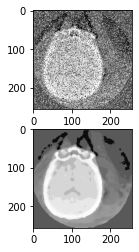

In [ ]:
# Median Filter
# Apply median filtering to the image with Salt-and-Pepper noise
median_filter_sp_noise = cv2.medianBlur(sp_img, figure_size)

# Create subplots to display the original image with Salt-and-Pepper noise
# and the image after median filtering
plt.subplot(211)
plt.imshow(sp_img, cmap=plt.cm.gray)
plt.title('Image with Salt-and-Pepper Noise')

plt.subplot(212)
plt.imshow(median_filter_sp_noise, cmap=plt.cm.gray)
plt.title('Median Filtered Image')

# Display the subplots
plt.show()

## Image Thresholding

Thresholding is the process of converting a grayscale image to a binary image. Binary image has only two values (black and white).

**Tasks** 
 
 Generate binary image with different thresholds.

 What is the best way to select an optimal threshold?



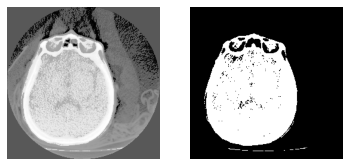

In [ ]:
# Thresholding
# Create a binary mask by setting pixels above a threshold to True
binary = img_rescale > 170

# Create subplots to display the original image and the binary mask
plt.subplot(1, 2, 1)
plt.imshow(img_rescale, cmap=plt.cm.gray)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary, cmap=plt.cm.gray)
plt.title('Binary Mask (Threshold = 170)')
plt.axis('off')

# Display the subplots
plt.show()

## Morphological Operation

Erosion and Dilation operation

**Tasks** 
 
 Modify the filter size and vary the number of iterations.
 
 What would be a suitable application of the erosion and dilation morphological operation?

(-0.5, 255.5, 255.5, -0.5)

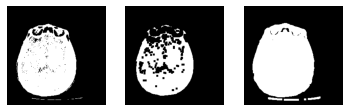

In [ ]:
# Convert the binary mask to 'uint8' format and scale to [0, 255]
binary = np.array(255 * binary, dtype='uint8')

# Define a 5x5 matrix as the kernel for erosion and dilation
kernel = np.ones((5, 5), np.uint8)

# Erosion
# Erode the binary mask using the defined kernel
img_erosion = cv2.erode(binary, kernel)

# Dilation
# Dilate the binary mask using the defined kernel
img_dilation = cv2.dilate(binary, kernel)

# Create subplots to display the binary mask, eroded image, and dilated image
plt.subplot(131)
plt.imshow(binary, cmap=plt.cm.gray)
plt.title('Binary Mask')
plt.axis('off')

plt.subplot(132)
plt.imshow(img_erosion, cmap=plt.cm.gray)
plt.title('Erosion')
plt.axis('off')

plt.subplot(133)
plt.imshow(img_dilation, cmap=plt.cm.gray)
plt.title('Dilation')
plt.axis('off')

# Display the subplots
plt.show()

In [ ]:
# Convert the binary mask to 'uint8' format and scale to [0, 255]
binary = np.array(255 * binary, dtype='uint8')

# Define a 5x5 matrix as the kernel for erosion and dilation
kernel = np.ones((5, 5), np.uint8)

# Erosion
# Erode the binary mask using the defined kernel
img_erosion = cv2.erode(binary, kernel)

# Dilation
# Dilate the binary mask using the defined kernel
img_dilation = cv2.dilate(binary, kernel)

# Create subplots to display the binary mask, eroded image, and dilated image
plt.subplot(131)
plt.imshow(binary, cmap=plt.cm.gray)
plt.title('Binary Mask')
plt.axis('off')

plt.subplot(132)
plt.imshow(img_erosion, cmap=plt.cm.gray)
plt.title('Erosion')
plt.axis('off')

plt.subplot(133)
plt.imshow(img_dilation, cmap=plt.cm.gray)
plt.title('Dilation')
plt.axis('off')

# Display the subplots
plt.show()

In [ ]:
# Task 1 - the no of iterations and filter size has been varied

# Convert the binary mask to 'uint8' format and scale to [0, 255]
binary = np.array(255 * binary, dtype='uint8')

# Define a 3x3 matrix as the kernel for erosion and dilation
kernel = np.ones((3, 3), np.uint8)

# Erosion
# Erode the binary mask using the defined kernel with 2 iterations
img_erosion = cv2.erode(binary, kernel, iterations=2)

# Dilation
# Dilate the binary mask using the defined kernel with 3 iterations
img_dilation = cv2.dilate(binary, kernel, iterations=3)

# Create subplots to display the binary mask, eroded image, and dilated image
plt.subplot(131)
plt.imshow(binary, cmap=plt.cm.gray)
plt.title('Binary Mask')
plt.axis('off')

plt.subplot(132)
plt.imshow(img_erosion, cmap=plt.cm.gray)
plt.title('Erosion (2 iterations)')
plt.axis('off')

plt.subplot(133)
plt.imshow(img_dilation, cmap=plt.cm.gray)
plt.title('Dilation (3 iterations)')
plt.axis('off')

# Display the subplots
plt.show()

### Erosion:
1. *Noise Reduction:*
   - Erosion is effective in reducing noise in binary images, especially salt-and-pepper noise. It helps eliminate small isolated bright or dark regions.
  
2. *Segmentation:*
   - In image segmentation, erosion can be used to separate objects that are close to each other. It helps to break thin regions and create distinct boundaries.

3. *Separation of Overlapping Objects:*
   - Erosion is useful in separating overlapping objects in an image by breaking the connections between them.

4. *Skeletonization:*
   - Erosion can be applied iteratively to thin structures in an image, creating a skeleton that preserves the essential shape and connectivity of the objects.

### Dilation:
1. *Object Enlargement:*
   - Dilation is used to enlarge the boundaries of objects in a binary image. It helps in connecting nearby regions and closing small gaps between objects.

2. *Filling Holes:*
   - Dilation is effective in filling small holes or gaps within objects in a binary image, making the objects more solid.

3. *Merging Overlapping Objects:*
   - Dilation can be used to merge overlapping objects in an image by expanding their boundaries until they touch or overlap.

4. *Text or Image Thickening:*
   - Dilation is useful for thickening text or other features in an image. It enhances the visibility of thin structures.

5. *Morphological Gradient:*
   - The morphological gradient, which is the difference between dilation and erosion, is used to highlight the boundaries of objects in an image.

### Common Applications:
- *Image Preprocessing:*
  - Both erosion and dilation are often employed as preprocessing steps to improve the results of other image processing tasks, such as segmentation and feature extraction.

- *Medical Imaging:*
  - In medical imaging, morphological operations are used for tasks like blood vessel segmentation, tissue extraction, and noise reduction.

- *Document Image Processing:*
  - Erosion and dilation can be used for enhancing text in document images, removing noise, and improving character recognition.

- *Quality Control:*
  - In industrial applications, these operations are used for quality control, defect detection, and object counting.